In [115]:
import os
import re
import pandas as pd
import numpy as np
import sys
import glob
import traceback
import json
import folium
import datetime

sys.path.append('/lib')
import lib.helper as helper

%matplotlib inline
%load_ext folium_magic

CURRENT_DIR = os.getcwd()
DATA_DIR = CURRENT_DIR + '/data'
RAW_DATA_DIR = DATA_DIR + '/raw'
ANALYSES_DIR = "data/analyses/"
MAPS_DIR = DATA_DIR + "/maps"
UK_REGIONS_FILE = CURRENT_DIR + '/lib/UK-regions.json'

The folium_magic extension is already loaded. To reload it, use:
  %reload_ext folium_magic


In [116]:
# Absolute or relative path to processed instructor data that we want to analyse/map (REDASH)
instructors_file = "data/processed/redash_processed_carpentry_instructors_UK_2020-04-03.csv"

In [117]:
instructors_df = pd.read_csv(instructors_file, encoding = "utf-8")

In [118]:
# Let's inspect our data
instructors_df.head(50)

,first_name,last_name,institution,institutional_region,normalised_institution,latitude,longitude,country,country_code,workshops,...,dc-instructor,lc-instructor,trainer,earliest_badge_awarded,year_earliest_badge_awarded,airport,airport_code,airport_latitude,airport_longitude,airport_region
0,Samantha,Ahern,University College London,London,University College London,51.524774,-0.133401,United Kingdom,GB,"{""2016-02-17-UCL_software_carpentry"": ""2016-02...",...,NaN,NaN,NaN,2017-12-08,2017,London Heathrow,LHR,51.477500,-0.461389,London
1,James,Allen,NaN,NaN,NaN,NaN,NaN,United Kingdom,GB,"{""2015-01-14-oxford"": ""2015-01-14"", ""2015-09-2...",...,NaN,NaN,NaN,2014-11-27,2014,Exeter,EXT,50.734444,-3.413889,South West
2,Mario,Antonioletti,University of Edinburgh,Scotland,University of Edinburgh,55.948003,-3.188111,United Kingdom,GB,"{""2013-05-09-oxford"": ""2013-05-09"", ""2013-12-0...",...,2016-10-06,NaN,NaN,2014-12-23,2014,Edinburgh,EDI,55.950000,-3.372500,Scotland
3,James,Baker,University of Sussex,South East,University of Sussex,50.864464,-0.087049,United Kingdom,GB,"{""2017-05-18-pitt"": ""2017-05-18"", ""2017-09-14-...",...,2017-06-08,NaN,NaN,2017-06-08,2017,London Gatwick,LGW,51.148056,-0.190278,South East
4,Robert,Beagrie,University of Oxford,South East,University of Oxford,51.757644,-1.262868,United Kingdom,GB,"{""2014-08-26-cam"": ""2014-08-26"", ""2016-03-23-I...",...,2016-11-15,NaN,NaN,2014-05-09,2014,London Heathrow,LHR,51.477500,-0.461389,London
5,Niall,Beard,University of Manchester,NaN,University of Manchester,NaN,NaN,United Kingdom,GB,"{""2015-11-09-manchester"": ""2015-11-09"", ""2017-...",...,NaN,NaN,NaN,2019-01-07,2019,Manchester,MAN,53.353611,-2.274722,North West
6,Evgenij,Belikov,"EPCC, University of Edinburgh",NaN,"EPCC, University of Edinburgh",NaN,NaN,United Kingdom,GB,"{""2015-11-25-edinburgh"": ""2015-11-25"", ""2018-0...",...,2016-01-27,NaN,NaN,2015-05-26,2015,Edinburgh,EDI,55.950000,-3.372500,Scotland
7,Miguel,Bernabeu,University of Edinburgh,Scotland,University of Edinburgh,55.948003,-3.188111,United Kingdom,GB,"{""2013-04-04-ucl"": ""2013-04-04"", ""2013-09-27-u...",...,NaN,NaN,NaN,2014-07-22,2014,Edinburgh,EDI,55.950000,-3.372500,Scotland
8,Philipp,Boersch-Supan,British Trust for Ornithology,NaN,British Trust for Ornithology,NaN,NaN,United Kingdom,GB,NaN,...,NaN,NaN,NaN,2017-12-08,2017,Stansted,STN,51.885000,0.235000,Eastern
9,Lisa,Breckels,University of Cambridge,Eastern,University of Cambridge,52.205317,0.116642,United Kingdom,GB,"{""2017-01-18-CAM"": ""2017-01-18""}",...,2016-11-11,NaN,NaN,2016-11-11,2016,Stansted,STN,51.885000,0.235000,Eastern


In [119]:
# Absolute or relative path to processed instructor data that we want to analyse/map (AMY)
instructors_file_amy = "data/processed/amy_processed_carpentry_instructors_UK_2020-03-22.csv"
instructors_df_amy = pd.read_csv(instructors_file_amy, encoding = "utf-8")
instructors_df_amy.head(50)

,institution,institutional_region,normalised_institution,latitude,longitude,country,country_code,swc-instructor,dc-instructor,lc-instructor,trainer,year_earliest_instructor_badge_awarded,badges,domains,lessons,airport,airport_code,airport_latitude,airport_longitude,airport_region
0,University College London,London,University College London,51.524774,-0.133401,United Kingdom,GB,2019-05-09,NaN,NaN,NaN,2019,['swc-instructor'],"['Education', 'Humanities', 'Library and infor...",[],NaN,NaN,NaN,NaN,NaN
1,University College London,London,University College London,51.524774,-0.133401,United Kingdom,GB,2017-12-08,NaN,NaN,NaN,2017,['swc-instructor'],[],[],London Heathrow,LHR,51.477500,-0.461389,London
2,University College London,London,University College London,51.524774,-0.133401,United Kingdom,GB,2019-11-28,NaN,NaN,NaN,2019,['swc-instructor'],"['Computer science/electrical engineering', 'E...",[],NaN,NaN,NaN,NaN,NaN
3,Imperial College London,NaN,Imperial College London,NaN,NaN,United Kingdom,GB,2016-01-19,NaN,NaN,NaN,2016,['swc-instructor'],['Computer science/electrical engineering'],"['dc/python', 'swc/matlab', 'swc/python']",London Heathrow,LHR,51.477500,-0.461389,London
4,Microsoft,North West,Microsoft,53.479047,-2.238965,United Kingdom,GB,NaN,2017-06-15,NaN,2018-03-12,2017,"['dc-instructor', 'maintainer', 'trainer']","['Computer science/electrical engineering', 'E...","['dc/python', 'dc/r', 'dc/shell', 'swc/git', '...",Manchester,MAN,53.353611,-2.274722,North West
5,NaN,NaN,NaN,NaN,NaN,United Kingdom,GB,2014-11-27,NaN,NaN,NaN,2014,['swc-instructor'],[],"['dc/python', 'dc/shell', 'dc/sql', 'swc/git',...",Exeter,EXT,50.734444,-3.413889,South West
6,Imperial College London,NaN,Imperial College London,NaN,NaN,United Kingdom,GB,2019-02-27,NaN,NaN,NaN,2019,['swc-instructor'],"['Computer science/electrical engineering', 'P...",['swc/python'],London Gatwick,LGW,51.148056,-0.190278,South East
7,University of Florida,NaN,University of Florida,NaN,NaN,United Kingdom,GB,2018-03-20,NaN,NaN,NaN,2018,['swc-instructor'],['Mathematics/statistics'],"['dc/python', 'dc/r', 'dc/spreadsheets', 'dc/s...",London Heathrow,LHR,51.477500,-0.461389,London
8,University of Edinburgh,Scotland,University of Edinburgh,55.948003,-3.188111,United Kingdom,GB,2014-12-23,2016-10-06,NaN,NaN,2014,"['swc-instructor', 'dc-instructor']",['Physics'],"['dc/r', 'dc/shell', 'swc/git', 'swc/make', 's...",Edinburgh,EDI,55.950000,-3.372500,Scotland
9,University of Southampton,South East,University of Southampton,50.934180,-1.395675,United Kingdom,GB,NaN,2017-09-07,NaN,NaN,2017,['dc-instructor'],"['Civil, mechanical, chemical, or nuclear engi...","['dc/r', 'dc/shell', 'dc/spreadsheets', 'swc/g...",Southampton,SOU,50.950000,-1.356667,South East


In [120]:
instructors_df.columns

Index(['first_name', 'last_name', 'institution', 'institutional_region',
       'normalised_institution', 'latitude', 'longitude', 'country',
       'country_code', 'workshops', 'taught_workshops',
       'taught_workshop_dates', 'domains', 'badges', 'badges_dates',
       'swc-instructor', 'dc-instructor', 'lc-instructor', 'trainer',
       'earliest_badge_awarded', 'year_earliest_badge_awarded', 'airport',
       'airport_code', 'airport_latitude', 'airport_longitude',
       'airport_region'],
      dtype='object')

In [121]:
instructors_df_amy.columns

Index(['institution', 'institutional_region', 'normalised_institution',
       'latitude', 'longitude', 'country', 'country_code', 'swc-instructor',
       'dc-instructor', 'lc-instructor', 'trainer',
       'year_earliest_instructor_badge_awarded', 'badges', 'domains',
       'lessons', 'airport', 'airport_code', 'airport_latitude',
       'airport_longitude', 'airport_region'],
      dtype='object')

In [122]:
# How many instructors are there in total?
instructors_df.index.size

256

      number_of_instructors
year                       
0                         3
2012                      5
2013                     10
2014                     22
2015                     21
2016                     25
2017                     46
2018                     41
2019                     64
2020                     19


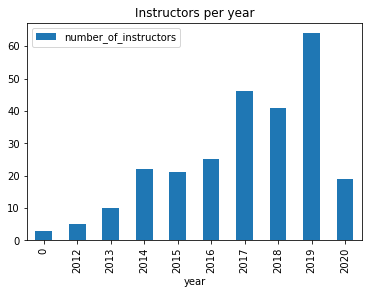

In [123]:
# How many new instructors are there for each year?
instructors_per_year = instructors_df['year_earliest_badge_awarded'].value_counts()
instructors_per_year.sort_index(ascending = True, inplace=True)
instructors_per_year.index.name = 'year'
instructors_per_year = instructors_per_year.to_frame('number_of_instructors')
print(instructors_per_year)
instructors_per_year.plot(kind='bar', legend=True, title ="Instructors per year")

In [124]:
idx = instructors_df.columns.get_loc("taught_workshops")
instructors_df.insert(loc=idx+1, column='last_workshop_taught', value=instructors_df["taught_workshop_dates"])
instructors_df['last_workshop_taught'] = instructors_df['taught_workshop_dates'].apply(lambda x: helper.latest_date(x))
instructors_df.head(10)

,first_name,last_name,institution,institutional_region,normalised_institution,latitude,longitude,country,country_code,workshops,...,dc-instructor,lc-instructor,trainer,earliest_badge_awarded,year_earliest_badge_awarded,airport,airport_code,airport_latitude,airport_longitude,airport_region
0,Samantha,Ahern,University College London,London,University College London,51.524774,-0.133401,United Kingdom,GB,"{""2016-02-17-UCL_software_carpentry"": ""2016-02...",...,NaN,NaN,NaN,2017-12-08,2017,London Heathrow,LHR,51.477500,-0.461389,London
1,James,Allen,NaN,NaN,NaN,NaN,NaN,United Kingdom,GB,"{""2015-01-14-oxford"": ""2015-01-14"", ""2015-09-2...",...,NaN,NaN,NaN,2014-11-27,2014,Exeter,EXT,50.734444,-3.413889,South West
2,Mario,Antonioletti,University of Edinburgh,Scotland,University of Edinburgh,55.948003,-3.188111,United Kingdom,GB,"{""2013-05-09-oxford"": ""2013-05-09"", ""2013-12-0...",...,2016-10-06,NaN,NaN,2014-12-23,2014,Edinburgh,EDI,55.950000,-3.372500,Scotland
3,James,Baker,University of Sussex,South East,University of Sussex,50.864464,-0.087049,United Kingdom,GB,"{""2017-05-18-pitt"": ""2017-05-18"", ""2017-09-14-...",...,2017-06-08,NaN,NaN,2017-06-08,2017,London Gatwick,LGW,51.148056,-0.190278,South East
4,Robert,Beagrie,University of Oxford,South East,University of Oxford,51.757644,-1.262868,United Kingdom,GB,"{""2014-08-26-cam"": ""2014-08-26"", ""2016-03-23-I...",...,2016-11-15,NaN,NaN,2014-05-09,2014,London Heathrow,LHR,51.477500,-0.461389,London
5,Niall,Beard,University of Manchester,NaN,University of Manchester,NaN,NaN,United Kingdom,GB,"{""2015-11-09-manchester"": ""2015-11-09"", ""2017-...",...,NaN,NaN,NaN,2019-01-07,2019,Manchester,MAN,53.353611,-2.274722,North West
6,Evgenij,Belikov,"EPCC, University of Edinburgh",NaN,"EPCC, University of Edinburgh",NaN,NaN,United Kingdom,GB,"{""2015-11-25-edinburgh"": ""2015-11-25"", ""2018-0...",...,2016-01-27,NaN,NaN,2015-05-26,2015,Edinburgh,EDI,55.950000,-3.372500,Scotland
7,Miguel,Bernabeu,University of Edinburgh,Scotland,University of Edinburgh,55.948003,-3.188111,United Kingdom,GB,"{""2013-04-04-ucl"": ""2013-04-04"", ""2013-09-27-u...",...,NaN,NaN,NaN,2014-07-22,2014,Edinburgh,EDI,55.950000,-3.372500,Scotland
8,Philipp,Boersch-Supan,British Trust for Ornithology,NaN,British Trust for Ornithology,NaN,NaN,United Kingdom,GB,NaN,...,NaN,NaN,NaN,2017-12-08,2017,Stansted,STN,51.885000,0.235000,Eastern
9,Lisa,Breckels,University of Cambridge,Eastern,University of Cambridge,52.205317,0.116642,United Kingdom,GB,"{""2017-01-18-CAM"": ""2017-01-18""}",...,2016-11-11,NaN,NaN,2016-11-11,2016,Stansted,STN,51.885000,0.235000,Eastern


In [125]:
# Average number of workshops taught per year
instructors_df['taught_workshop_dates'] = instructors_df['taught_workshop_dates'].str.split(',') #Series of list of strings
idx = instructors_df.columns.get_loc("taught_workshop_dates")
instructors_df.insert(loc=idx, column='taught_workshop_years', value=instructors_df["taught_workshop_dates"])
instructors_df['taught_workshop_years'] = instructors_df['taught_workshop_dates'].apply(lambda x: None if (x is None or x is np.nan) else [datetime.datetime.strptime(date, '%Y-%m-%d').year for date in x]) # Series of list of datetime objects
print("\nYears instructors taught: \n")
print(instructors_df['taught_workshop_years'])
average_workshops_per_year = workshop_years.apply(lambda x: pd.Series(x).value_counts().mean())
print("\nAverage number of workshops per year per instructor: \n")
print(average_workshops_per_year)
print("\nAverage number of workshops per year across all instructors: " + str(average_workshops_per_year.mean()))


Years instructors taught: 

0                         [2016, 2017, 2017, 2018, 2020]
1                                           [2015, 2015]
2      [2013, 2013, 2014, 2015, 2015, 2015, 2016, 201...
3                   [2017, 2017, 2018, 2017, 2015, 2017]
4                         [2014, 2016, 2017, 2018, 2019]
5                                     [2015, 2017, 2019]
6             [2015, 2018, 2019, 2019, 2020, 2020, 2019]
7                                     [2013, 2013, 2014]
8                                                   None
9                                                 [2017]
10                                          [2013, 2018]
11     [2014, 2015, 2015, 2015, 2015, 2016, 2016, 201...
12                              [2012, 2012, 2012, 2013]
13                                    [2018, 2019, 2019]
14                                                [2017]
15                                                [2012]
16                                          [2018, 2019]
17

In [138]:
# How many instructors did not teach in the last year and a bit
last_taught_year = instructors_df.dropna(subset=['taught_workshop_years'])['taught_workshop_years'].apply(lambda x: max(x))
print(max_year)
didnt_teach_recently = last_taught_year.where(last_taught_year < 2019).dropna().astype(int)
print("\nNumber of instructor that did not teach since 2018: " + str(len(didnt_teach_recently.index)))
print("\nPercentage of total instructors: " + str(100*len(didnt_teach_recently.index)/len(instructors_df.index)) + "%")

0      2020
1      2015
2      2019
3      2018
4      2019
5      2019
6      2020
7      2014
9      2017
10     2018
11     2019
12     2013
13     2019
14     2017
15     2012
16     2019
18     2017
19     2017
20     2019
22     2020
23     2017
24     2013
25     2014
27     2017
30     2014
31     2020
32     2016
33     2014
34     2014
35     2017
       ... 
179    2019
181    2020
182    2019
183    2019
184    2019
187    2020
188    2019
191    2019
192    2019
193    2019
195    2019
199    2019
201    2019
203    2019
204    2019
205    2019
206    2019
208    2019
209    2019
222    2019
237    2020
240    2020
241    2020
243    2019
246    2019
247    2020
248    2020
249    2020
251    2019
253    2019
Name: taught_workshop_years, Length: 154, dtype: int64

Number of instructor that did not teach since 2018: 71

Percentage of total instructors: 27.734375%


In [140]:
# How many totally inactive instructors, e.g. did not teach for > 3 years
inactive = last_taught_year.where(last_taught_year < 2017).dropna().astype(int)
print("\nNumber of inactive instructors: " + str(len(inactive.index)))
print("\nPercentage of total instructors: " + str(100*len(inactive.index)/len(instructors_df.index)) + "%")


Number of inactive instructors: 33

Percentage of total instructors: 12.890625%


Imperial College London                                                                          26
University College London                                                                        18
University of Oxford                                                                             14
University of Edinburgh                                                                          13
University of Leeds                                                                              13
The University of Manchester                                                                     11
University of Birmingham                                                                          9
University of Sheffield                                                                           9
University of Southampton                                                                         8
University of Manchester                                                                          7


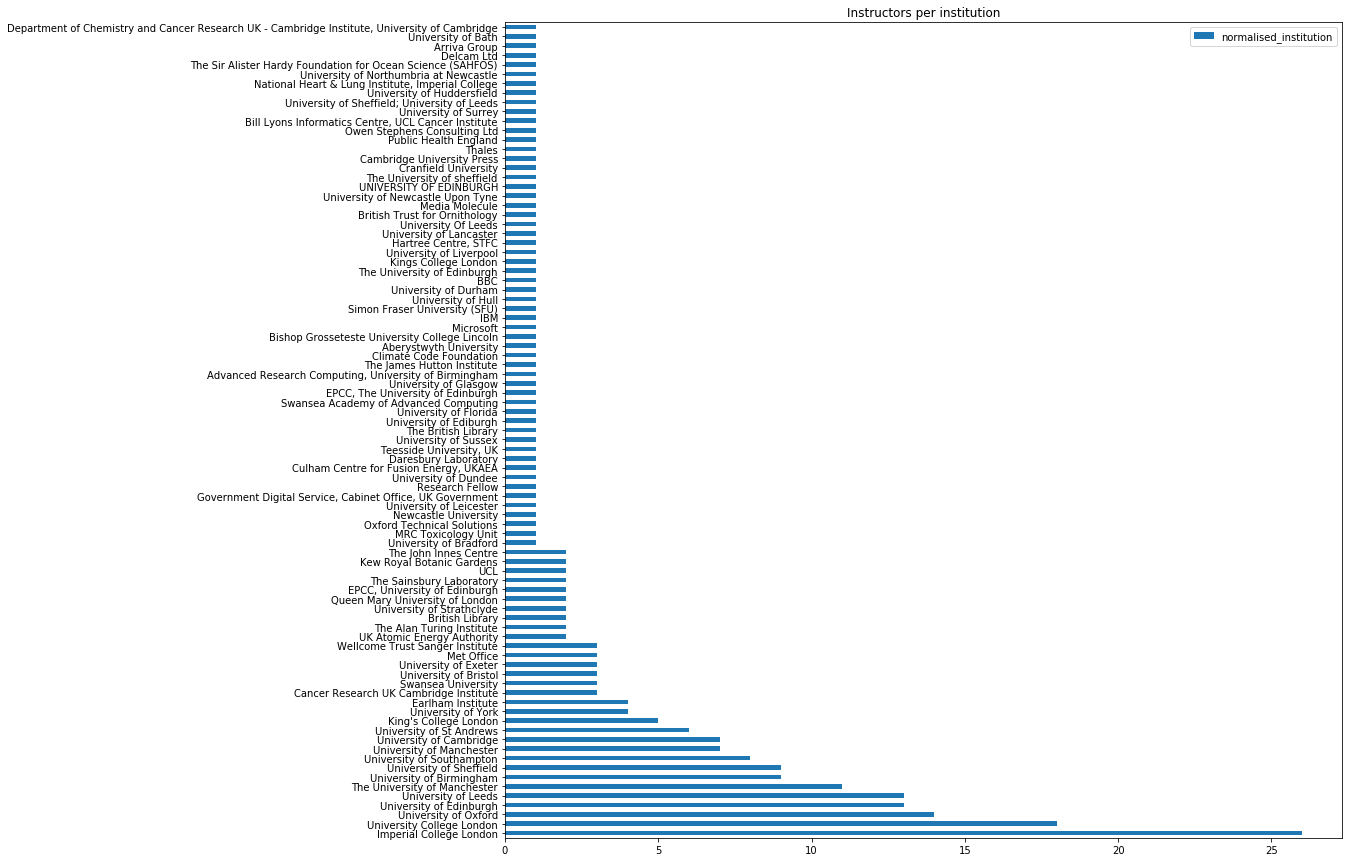

In [127]:
# How many instructors are there at each institution?
instructors_per_institution = instructors_df['normalised_institution'].value_counts()
print(instructors_per_institution)
instructors_per_institution.plot(kind='barh', legend=True, title ="Instructors per institution", figsize = (15,15))

In [128]:
# How many instructors do we not have normalised institution for?
instructors_df['normalised_institution'].isnull().sum()

8

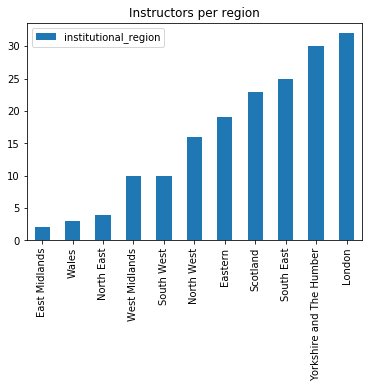

In [129]:
# How are instructors spread over UK regions based on their affiliations?
instructors_per_region = instructors_df['institutional_region'].value_counts()
instructors_per_region.sort_values(inplace=True)
instructors_per_region.plot(kind='bar', legend=True, title ="Instructors per region")

In [130]:
# How many instructors do we not have region for?
instructors_df['institutional_region'].isnull().sum()

82

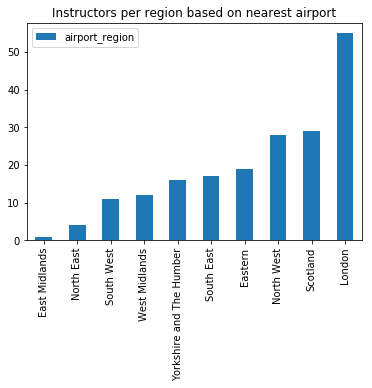

In [131]:
# How are instructors spread over UK regions based on the nearest airpor?
instructors_per_region_nearest_airport = instructors_df['airport_region'].value_counts()
instructors_per_region_nearest_airport.sort_values(inplace=True)
instructors_per_region_nearest_airport.plot(kind='bar', legend=True, title ="Instructors per region based on nearest airport")

In [132]:
# How many insructors do we not have regions based on the nearest airport?
instructors_df['airport_region'].isnull().sum()

64

In [133]:
# Let's merge region info - if we have institutional region - use that, if not - use airport reqion, else leave blank
instructors_df['region'] = instructors_df.apply(
    lambda x: x['institutional_region'] if pd.notnull(x['institutional_region']) else x['airport_region'],
    axis=1)
# How many instructors do we not have region for now?
print("No region info for " + str(instructors_df['region'].isnull().sum()) + ' instructors')
instructors_df[['institutional_region','airport_region', 'region']].head(50)

No region info for 29 instructors


,institutional_region,airport_region,region
0,London,London,London
1,NaN,South West,South West
2,Scotland,Scotland,Scotland
3,South East,South East,South East
4,South East,London,South East
5,NaN,North West,North West
6,NaN,Scotland,Scotland
7,Scotland,Scotland,Scotland
8,NaN,Eastern,Eastern
9,Eastern,Eastern,Eastern


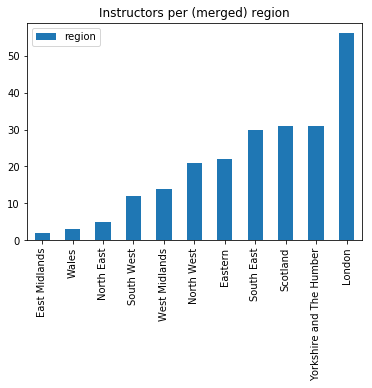

In [134]:
instructors_per_region_merged = instructors_df['region'].value_counts()
instructors_per_region_merged.sort_values(inplace=True)
instructors_per_region_merged.plot(kind='bar', legend=True, title ="Instructors per (merged) region")

In [135]:
# # Let's do a choropleth map of instructors per UK regions
# instructors_map = helper.generate_choropleth_map(instructors_df, uk_regions, "instructors")
# instructors_map

In [136]:
# A clustered map of all instructor affiliaiton locations
# Add column 'description' which is used for popups in maps
instructors_df['popup'] = instructors_df["institution"]
instructors_map = helper.generate_map_with_clustered_markers(instructors_df.dropna(subset=['longitude', 'latitude']))
instructors_map

In [137]:
# Save all analyses into an Excel spreadsheet
if not os.path.exists(ANALYSES_DIR):
    os.makedirs(ANALYSES_DIR)

instructors_file_name = os.path.basename(instructors_file)
instructors_file_name_without_extension = re.sub('\.csv$', '', instructors_file_name.strip())
instructors_analyses_excel_file = ANALYSES_DIR + "analysed_" + instructors_file_name_without_extension + '_from_ipynb.xlsx'

excel_writer = pd.ExcelWriter(instructors_analyses_excel_file, engine='xlsxwriter')

instructors_df.to_excel(excel_writer, sheet_name="carpentry_instructors", index=False)

# Instructors per year
instructors_per_year.to_excel(excel_writer, sheet_name='instructors_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['instructors_per_year']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['instructors_per_year', 1, 0, len(instructors_per_year.index), 0],
        'values': ['instructors_per_year', 1, 1, len(instructors_per_year.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of instructors', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of instructors per year'})
worksheet.insert_chart('I2', chart)

# Instructors per institution
instructors_per_institution.to_excel(excel_writer, sheet_name='instructors_per_institution', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['instructors_per_institution']
chart = workbook.add_chart({'type': 'bar'})
chart.add_series({
        'categories': ['instructors_per_institution', 1, 0, len(instructors_per_institution.index), 0],
        'values': ['instructors_per_institution', 1, 1, len(instructors_per_institution.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Host institution'})
chart.set_y_axis({'name': 'Number of instructors', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of instructors per host'})
worksheet.insert_chart('I2', chart)

# Instructors per region
instructors_per_region_merged.to_excel(excel_writer, sheet_name='instructors_per_region', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['instructors_per_region']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['instructors_per_region', 1, 0, len(instructors_per_region_merged.index), 0],
        'values': ['instructors_per_region', 1, 1, len(instructors_per_region_merged.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Region institution'})
chart.set_y_axis({'name': 'Number of instructors', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of instructors per region'})
worksheet.insert_chart('I2', chart)

excel_writer.save()
print("Saved instructors analyses in " + instructors_analyses_excel_file)

Saved instructors analyses in data/analyses/analysed_redash_processed_carpentry_instructors_UK_2020-04-03_from_ipynb.xlsx
